In [577]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [578]:
df_original = pd.read_csv('bank.csv', delimiter = ';')
df = df_original

In [579]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [580]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [581]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 4521 rows and 17 columns


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [583]:
print("\n Column name",df.columns)


 Column name Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [584]:
print("\n",df.dtypes)


 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [585]:
# check for null value
print("\n\n",df.isnull().sum())



 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [586]:
# calculating  sum of null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [587]:
# check fo duplicate data
print("\n check for duplicate \n",df.duplicated().sum())
           


 check for duplicate 
 0


In [588]:
# create dummy Variable for Purchased
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [589]:
df = pd.get_dummies(df)

In [590]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [591]:
df.min()

age                      19
default                   0
balance               -3313
housing                   0
loan                      0
day                       1
duration                  4
campaign                  1
pdays                    -1
previous                  0
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
contact_cellular          0
contact_telephone         0
contact_unknown           0
month_apr                 0
month_aug                 0
month_dec           

In [592]:
df.min()
# df.replace(0.0, df.mean(),inplace= True)

age                      19
default                   0
balance               -3313
housing                   0
loan                      0
day                       1
duration                  4
campaign                  1
pdays                    -1
previous                  0
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
contact_cellular          0
contact_telephone         0
contact_unknown           0
month_apr                 0
month_aug                 0
month_dec           

In [593]:
df.min()

age                      19
default                   0
balance               -3313
housing                   0
loan                      0
day                       1
duration                  4
campaign                  1
pdays                    -1
previous                  0
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
contact_cellular          0
contact_telephone         0
contact_unknown           0
month_apr                 0
month_aug                 0
month_dec           

In [594]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,...,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074,0.012693,-0.026179,0.048626,-0.017414
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,...,-0.004950,-0.013687,0.005580,0.008962,-0.017550,-0.014105,-0.040055,0.005801,-0.022410,0.038997
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,...,0.056023,0.021805,-0.070809,0.120363,0.058694,0.005975,0.025719,0.000129,0.029999,-0.033843
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,...,-0.085332,-0.072133,0.412996,0.006073,-0.102506,-0.060410,0.094246,0.046986,-0.088504,-0.062805
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,...,-0.036580,-0.038525,-0.032816,0.023113,-0.024372,-0.028523,-0.011652,-0.018397,-0.050643,0.041107
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.064235,-0.021062,-0.027720,0.075100
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,...,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023,-0.012852,0.008109,0.049255,-0.015239
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,...,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207,-0.094021,-0.030435,-0.058268,0.117375
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,...,-0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.708380,0.382970,0.212188,-0.867713
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,...,-0.084432,0.019445,0.027549,0.055400,0.088764,0.059763,0.475289,0.358382,0.250277,-0.682746


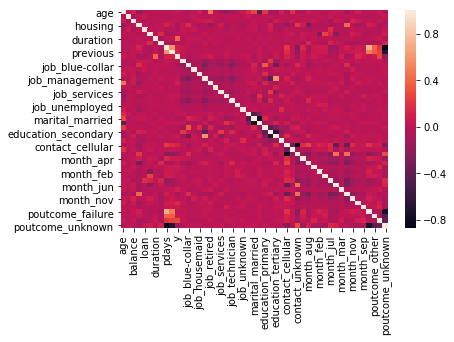

In [595]:
corr = df.corr()
sb.heatmap(corr)

In [596]:
df.shape

(4521, 49)

In [597]:
print (corr['y'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['y'].sort_values(ascending=False)[-10:])

y                     1.000000
duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
contact_cellular      0.118761
previous              0.116714
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
month_apr             0.062563
education_tertiary    0.056649
poutcome_other        0.051908
job_student           0.047809
Name: y, dtype: float64 

----------------------
education_secondary   -0.028744
month_jul             -0.038851
campaign              -0.061147
marital_married       -0.064643
job_blue-collar       -0.068147
loan                  -0.070517
month_may             -0.102077
housing               -0.104683
contact_unknown       -0.139399
poutcome_unknown      -0.162038
Name: y, dtype: float64


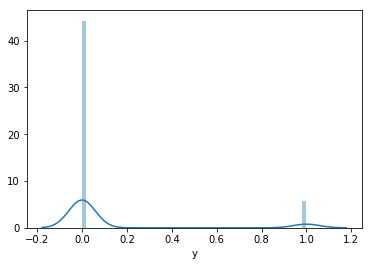

In [598]:
#SalePrice
sb.distplot(df['y'])
# sb.distplot(df)

In [599]:
df.skew()

age                     0.699501
default                 7.519405
balance                 6.596431
housing                -0.266522
loan                    1.930177
day                     0.094627
duration                2.772420
campaign                4.743914
pdays                   2.717071
previous                5.875259
y                       2.410736
job_admin.              2.565298
job_blue-collar         1.430050
job_entrepreneur        4.895427
job_housemaid           6.116887
job_management          1.392740
job_retired             4.089158
job_self-employed       4.664927
job_services            2.819328
job_student             7.132609
job_technician          1.758809
job_unemployed          5.689546
job_unknown            10.773076
marital_divorced        2.387156
marital_married        -0.488798
marital_single          1.067968
education_primary       1.961407
education_secondary    -0.040278
education_tertiary      0.880418
education_unknown       4.608005
contact_ce

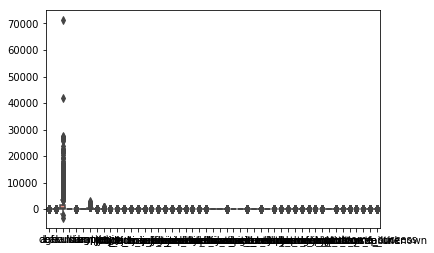

In [600]:
sb.boxplot(data=df)
plt.show()

In [601]:
# def remove_outlier(df):
#     df = df[np.abs(df - df.mean()) <= (3 * df.std())]
#     sb.boxplot(df)
#     return df
# remove_outlier(df)

In [602]:
def feature_scaling(df):
#     print("\n By Z score Method(Standerdization)  ")
#     df = np.divide((df - df.mean()),df.std())
    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
    return df
feature_scaling(df)

        age  default   balance  housing  loan       day  duration  campaign  \
0  0.161765      0.0  0.068455      0.0   0.0  0.600000  0.024826  0.000000   
1  0.205882      0.0  0.108750      1.0   1.0  0.333333  0.071500  0.000000   
2  0.235294      0.0  0.062590      1.0   0.0  0.500000  0.059914  0.000000   
3  0.161765      0.0  0.064281      1.0   1.0  0.066667  0.064548  0.061224   
4  0.588235      0.0  0.044469      1.0   0.0  0.133333  0.073486  0.000000   

      pdays  previous  ...  month_jun  month_mar  month_may  month_nov  \
0  0.000000      0.00  ...        0.0        0.0        0.0        0.0   
1  0.389908      0.16  ...        0.0        0.0        1.0        0.0   
2  0.379587      0.04  ...        0.0        0.0        0.0        0.0   
3  0.000000      0.00  ...        1.0        0.0        0.0        0.0   
4  0.000000      0.00  ...        0.0        0.0        1.0        0.0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.000000,0.389908,0.16,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.000000,0.379587,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.066667,0.064548,0.061224,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.0,0.044469,1.0,0.0,0.133333,0.073486,0.000000,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.235294,0.0,0.054496,0.0,0.0,0.733333,0.045349,0.020408,0.202982,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.250000,0.0,0.048590,1.0,0.0,0.433333,0.111552,0.000000,0.379587,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.294118,0.0,0.046442,1.0,0.0,0.166667,0.048659,0.020408,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.323529,0.0,0.047436,1.0,0.0,0.433333,0.017544,0.020408,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.352941,0.0,0.043288,1.0,1.0,0.533333,0.102284,0.000000,0.169725,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [603]:
# seperate data set
def features(df):
    output = df.y
#     y.head()
    df = df.drop('y', axis = 1)
    print("Seperate Target column from dataset")
    return df, output
df, output = features(df)

Seperate Target column from dataset


In [604]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(output))
    test_per_y = len(output)-train_per_y

    
    y_train_data = np.array(output[:train_per_y])
    y_test_data = np.array(output[:test_per_y])
    
   
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 3164
Test dataset: 1357

Convert pandas datafrem into numpy

X train data shape: (3164, 48)
y train data shape: (3164, 1)

X test data shape: (1357, 48)
y test data shape: (1357, 1)


In [625]:
class Single_Layer_Neural_Network :
    def __init__(self):
    
        self.learning_rate = 0.01
        # Total iterations
        self.epoch = 60000
        
    def gradient_descent(self,x_train_data, y_train_data):
        x_size = len(x_train_data)
        print("length of x_data",x_size)
        ncol = 48
        dw = 0.0
        dz= 0.0
        db = 0.0
        w = np.full((ncol+1,1),0.75)
        b = np.zeros((1, 1), dtype='float') 
        
        for i in range(self.epoch):
#             print("shape of W", w.shape)
#             print("shape of x_train_data",x_train_data.shape)
#             print("shape of B ", b.shape)
            z = np.dot(w.T, x_train_data.T )+ b
            
            sigmoid = 1/ (1 + np.exp(-z)) + b 
            
            dz = sigmoid - y_train_data.T
#             print("shape of dz",dz.shape)
            
            dw =np.dot(x_train_data.T , dz.T) / x_size
                  
            db = (np.sum(dz)) / x_size
#             print("DB",db)
            
            w = w - np.dot(self.learning_rate,dw)
            b = b - np.dot(self.learning_rate ,db)
#         print("shape of db",db)
            
        return w, b
    

    
    def prediction(self,w,b,x_test_data):
       
        prediction = np.zeros((x_test_data.shape[0], 1), dtype=float)
        
        

        print("shape W ",w.shape)
        print("shape", x_test_data.shape)
        z = np.dot(w.T, x_test_data.T) + b # Z = W*X = (1 x m)
        sigmoid = 1 / 1 + np.exp(-z)
#         print(z.shape, sigmoid.shape)

        for i in (range(0, len(sigmoid))):
            if round(sigmoid[i][0], 2) <= 0.5:
                prediction[i][0] = 0
            else:
                prediction[i][0] = 1
               
        prediction = np.reshape(prediction, (len(prediction), 1))
        return prediction
    
    

    
def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
    
     # class obj created
    

    obj = Single_Layer_Neural_Network()
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
#     print("x train data .....", x_train_data.shape)

    
    w, b = obj.gradient_descent(x_train_data, y_train_data )
    
    prediction_test = obj.prediction(w,b,x_test_data)
    print("prediction_test",prediction_test)
    prediction_train = obj.prediction(w,b,x_train_data)
    print("prediction_train",prediction_train)
    
    
     # It calculates the accuracy

    train_accuracy = (100 - np.mean(np.abs(prediction_train - y_train_data)) * 100)
    test_accuracy = (100 - np.mean(np.abs(prediction_test - y_test_data)) * 100)

    print("train_accuracy = ", train_accuracy)
    print("test_accuracy = ", test_accuracy)
    
    
    
            
main(df, x_train_data,y_train_data,x_test_data,y_test_data)            
            
            

length of x_data 3164
shape W  (49, 1)
shape (1357, 49)
prediction_test [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
shape W  (49, 1)
shape (3164, 49)
prediction_train [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
train_accuracy =  88.4007585335019
test_accuracy =  88.06190125276345
